# Scikit-Learn の練習
以下の資料を参考にしてやったところまで。途中で使えないattributeがあったので、最後まではやってないけど、使い方は大分分かった。
https://www.kaggle.com/c/data-science-london-scikit-learn/visualization/1091

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [2]:
print matplotlib.__version__
print sklearn.__version__

1.4.3
0.16.1


In [3]:
print("images shape: %s" % str(digits.images.shape))
print("targets shpae: %s" % str(digits.target.shape))

images shape: (1797, 8, 8)
targets shpae: (1797,)


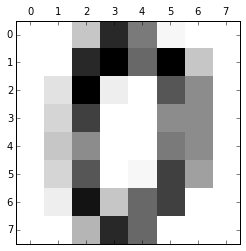

In [4]:
plt.matshow(digits.images[0],cmap=plt.cm.Greys);

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
X = digits.data.reshape(-1,64)
print(X.shape)

(1797, 64)


In [7]:
y = digits.target
print(y.shape)

(1797,)


17971個のデータポイントがあって、それぞれに8x8のイメージがある。なので64次元データ

In [8]:
print(X)

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


## PCA

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2)

In [11]:
pca.fit(X);

In [12]:
X_pca = pca.transform(X)
X_pca.shape

(1797, 2)

ここで２次元に落ちている。

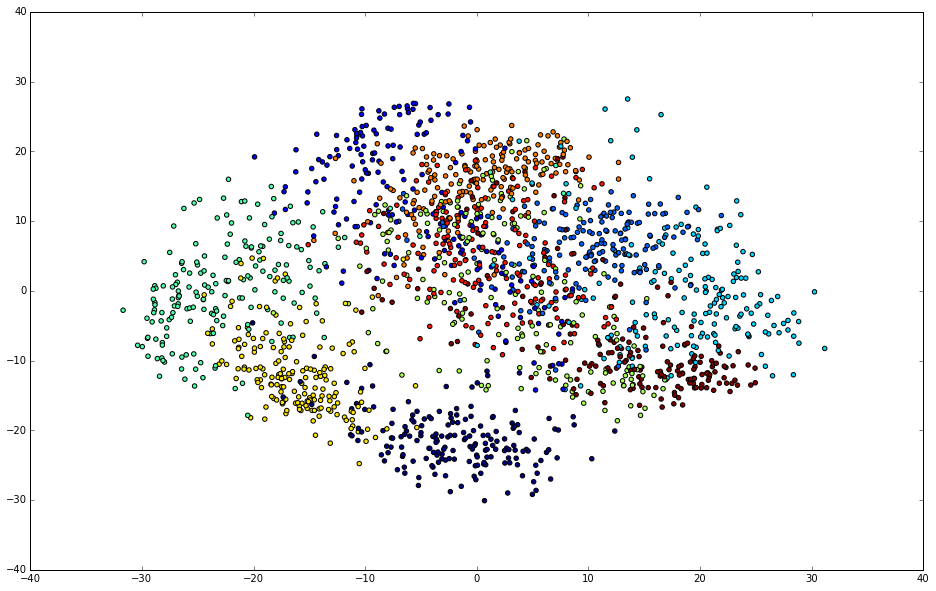

In [13]:
#plt.figsize(16,10)
fig = plt.figure(figsize=(16,10))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)

In [14]:
print(pca.mean_.shape)
print(pca.components_.shape)

(64,)
(2, 64)


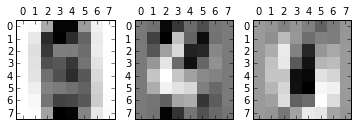

In [15]:
fix, ax = plt.subplots(1,3)
ax[0].matshow(pca.mean_.reshape(8,8),cmap=plt.cm.Greys)
ax[1].matshow(pca.components_[0,:].reshape(8,8),cmap=plt.cm.Greys)
ax[2].matshow(pca.components_[1,:].reshape(8,8),cmap=plt.cm.Greys);

##多様体学習
これはあんまりよく知らない。後で勉強しよう。

In [16]:
from sklearn.manifold import Isomap

In [17]:
isomap = Isomap(n_components=2,n_neighbors=20)

In [18]:
isomap.fit(X)

/usr/local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2507: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


Isomap(eigen_solver='auto', max_iter=None, n_components=2, n_neighbors=20,
    neighbors_algorithm='auto', path_method='auto', tol=0)

In [19]:
X_isomap = isomap.transform(X)
X_isomap.shape

(1797, 2)

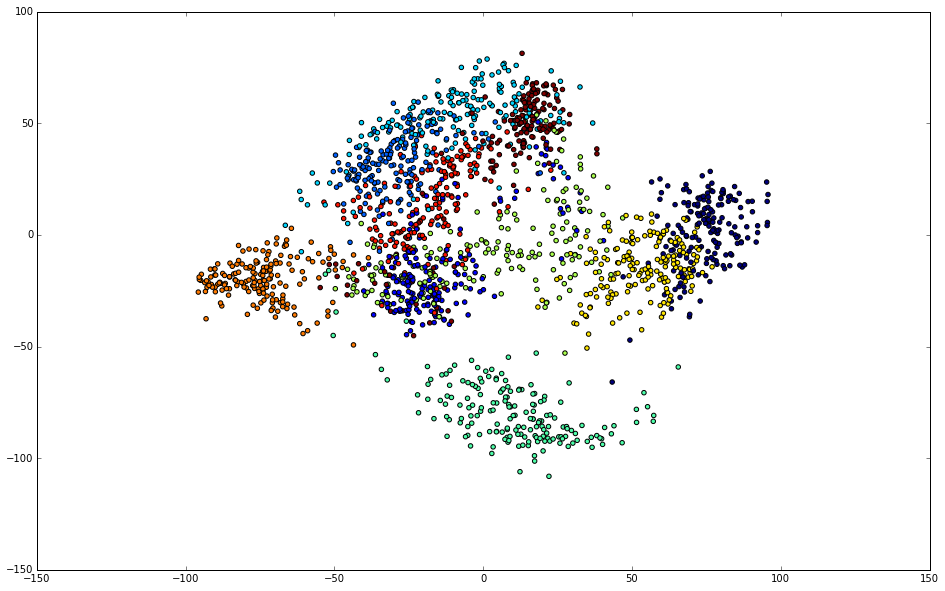

In [20]:
fig = plt.figure(figsize=(16,10))
plt.scatter(X_isomap[:,0],X_isomap[:,1],c=y);

In [21]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
print("X_train shape: %s" % repr(X_train.shape))
print("y_train shape: %s" % repr(y_train.shape))
print("X_test shape: %s" % repr(X_test.shape))
print("y_test shape: %s" % repr(y_test.shape))

X_train shape: (1347, 64)
y_train shape: (1347,)
X_test shape: (450, 64)
y_test shape: (450,)


## Linear SVC

In [23]:
from sklearn.svm import LinearSVC
svm = LinearSVC()

In [24]:
svm.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [25]:
svm.predict(X_train)

array([2, 8, 9, ..., 7, 7, 8])

In [26]:
svm.score(X_train,y_train)

0.99406087602078697

svm.scoreは、正解率の平均。上の例は、トレーニングデータでの正解率

In [27]:
svm.score(X_test,y_test)

0.93111111111111111

テストでの正解率は上記。

## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf = RandomForestClassifier()

In [30]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
rf.score(X_train,y_train)

0.99925760950259834

In [32]:
rf.score(X_test,y_test)

0.94444444444444442

In [33]:
from sklearn.cross_validation import cross_val_score
import numpy as np
scores = cross_val_score(rf,X_train,y_train,cv = 5)
print("score: %s mean: %f std: %f" % (str(scores),np.mean(scores),np.std(scores)))

score: [ 0.94525547  0.93726937  0.92250923  0.94382022  0.93939394] mean: 0.937650 std: 0.008104


In [34]:
scores = cross_val_score(rf,X_train,y_train,cv = 10)
print("score: %s mean: %f std: %f" % (str(scores),np.mean(scores),np.std(scores)))

score: [ 0.94285714  0.92753623  0.92753623  0.94074074  0.95522388  0.92537313
  0.96240602  0.93984962  0.95454545  0.93846154] mean: 0.941453 std: 0.012083


In [35]:
scores = cross_val_score(rf,X_train,y_train,cv = 3)
print("score: %s mea: %f std: %f" % (str(scores),np.mean(scores),np.std(scores)))

score: [ 0.9380531   0.94432071  0.92152466] mea: 0.934633 std: 0.009616


In [36]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(rf, X_train,y_train, cv = 5)
print("score: %s mean: %f std: %f" % (str(scores),np.mean(scores),np.std(scores)))

score: [ 0.93430657  0.94464945  0.95940959  0.91385768  0.94318182] mean: 0.939081 std: 0.014967


In [37]:
rf2 = RandomForestClassifier(n_estimators=50)
scores = cross_val_score(rf2,X_train,y_train,cv=5)
print("score: %s mean: %f std: %f" % (str(scores),np.mean(scores),np.std(scores)))

score: [ 0.96350365  0.95940959  0.95940959  0.97378277  0.96212121] mean: 0.963645 std: 0.005310


In [38]:
from sklearn.grid_search import GridSearchCV

In [39]:
param_grid = {'C':10. ** np.arange(-3,4)}
grid_search = GridSearchCV(svm,param_grid=param_grid,cv=3,verbose=3)

In [40]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] C=0.001 .........................................................
[CV] ................................ C=0.001, score=0.951327 -   0.0s
[CV] C=0.001 .........................................................
[CV] ................................ C=0.001, score=0.966592 -   0.0s
[CV] C=0.001 .........................................................
[CV] ................................ C=0.001, score=0.970852 -   0.0s
[CV] C=0.01 ..........................................................
[CV] ................................. C=0.01, score=0.951327 -   0.1s
[CV] C=0.01 ..........................................................
[CV] ................................. C=0.01, score=0.957684 -   0.1s
[CV] C=0.01 ..........................................................
[CV] ................................. C=0.01, score=0.959641 -   0.1s
[CV] C=0.1 ...........................................................
[CV] ............

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.2s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=3)

In [41]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 0.001}
0.96288047513


In [42]:
fig = plt.figure(figsize=(16,10))
plt.plot([c.mean_validation_score for c in grid_search.cv_scores_],label="validation error") ## ?
plt.plot([c.mean_training_score for c in grid_search.cv_scores_],label="training error") ## ?

AttributeError: 'GridSearchCV' object has no attribute 'cv_scores_'

どうも上のcv_scoresが、scikit-learnの0.16.1には入っていないみたいで、grid_scoresで、mean_validation_scoreは動いたけど、mean_training_scoreは動かなかった。どうもブランチに入らないとか、そんな話らしいので、これ以上の深入りはやめて、とりあえず、gridでよかったコストパラメータのCを当てはめて、モデルを作った。

In [44]:
svm = LinearSVC
estimator = svm(C=0.001)
estimator.fit(X_train,y_train)

LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [45]:
estimator.score(X_test,y_test)

0.96444444444444444

デフォルトのコストパラメータより良くなっていて、Random Forestよりも良い結果であった。やはりSVMはパラメータのチューニングが大事。